In [68]:
# import sys
# !{sys.executable} -m pip install pmdarima

In [69]:
# pip list

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [71]:
# AirPassengers data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
ap = pd.read_csv(url)
ap.drop('Month', axis = 1, inplace = True)
print(ap.head())

   Passengers
0         112
1         118
2         132
3         129
4         121


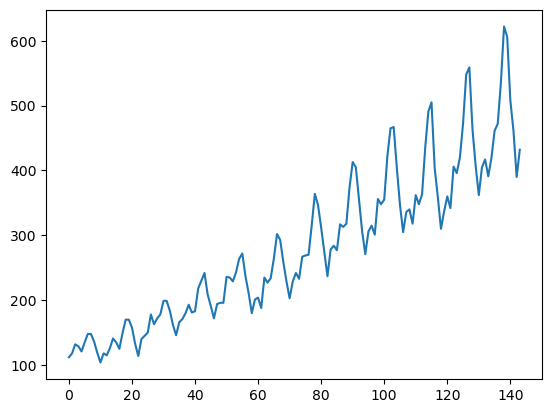

In [72]:
plt.plot(ap)
plt.show()

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Î∂ÑÏÇ∞ÏùÑ ÏùºÏ†ïÌïòÍ≤å Ï°∞Ï†à

In [129]:
ap_tf = np.log(ap)

In [130]:
ap_tf

Passengers
0      4.718499
1      4.770685
2      4.882802
3      4.859812
4      4.795791
..          ...
139    6.406880
140    6.230481
141    6.133398
142    5.966147
143    6.068426

[144 rows x 1 columns]

acfÏôÄ pacfÎ°ú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Î©¥,  
Î™á ÏãúÏ†ê Ï†ÑÍπåÏßÄÏùò Í∞íÏù¥ ÌòÑÏû¨ Í∞íÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌååÏïÖÌï† Ïàò ÏûàÎã§.

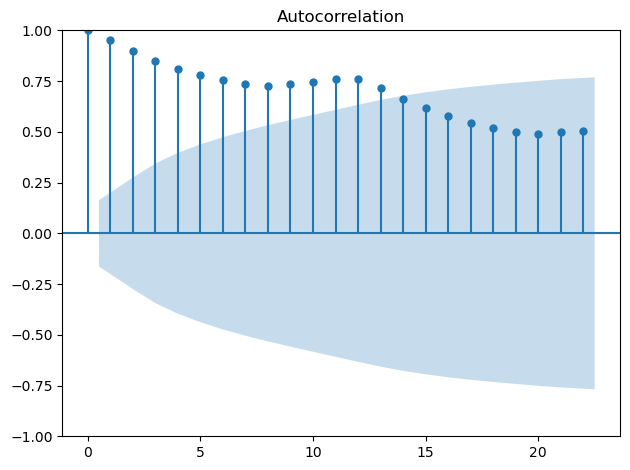

In [131]:
plot_acf(ap_tf) # acf_plot 
plt.tight_layout()

ACF/PACF Í∑∏ÎûòÌîÑÏóêÏÑú ÏßÄÏÜçÏ†ÅÏù∏ ÎÜíÏùÄ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ Î≥¥Ïù¥Î©¥ ÎπÑÏ†ïÏÉÅÏÑ± ÏãúÍ≥ÑÏó¥Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.

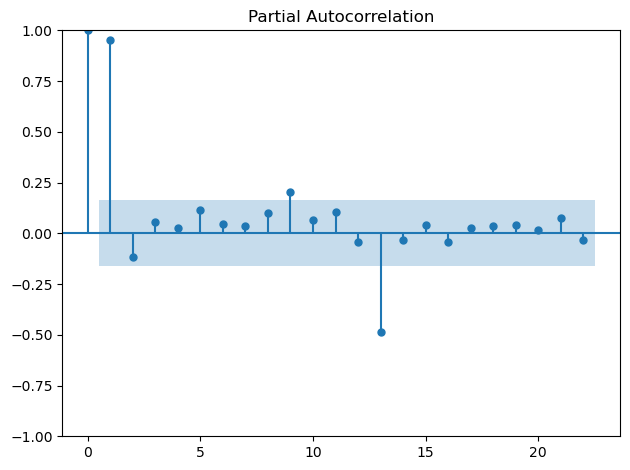

In [132]:
plot_pacf(ap_tf)
plt.tight_layout()

acf_plot: Ï†êÏ†ê Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•  
pacf_plot: lag 2ÍπåÏßÄ Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º Î≥¥ÏûÑ

### Ï∞®Î∂ÑÏùÑ ÌÜµÌï¥ Ï∂îÏÑ∏ Ï†úÍ±∞

In [133]:
ap_diff = ap_tf.diff()
ap_diff = ap_diff.dropna()

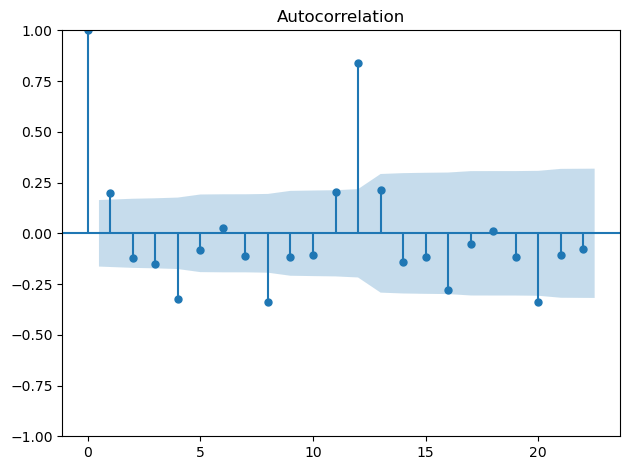

In [134]:
plot_acf(ap_diff)
plt.tight_layout()

lag 1 Í≥º lag 12 ÏóêÏÑú Ïú†ÏùòÎØ∏Ìïú lag Í∞Ä Ìè¨Ï∞©Îê®

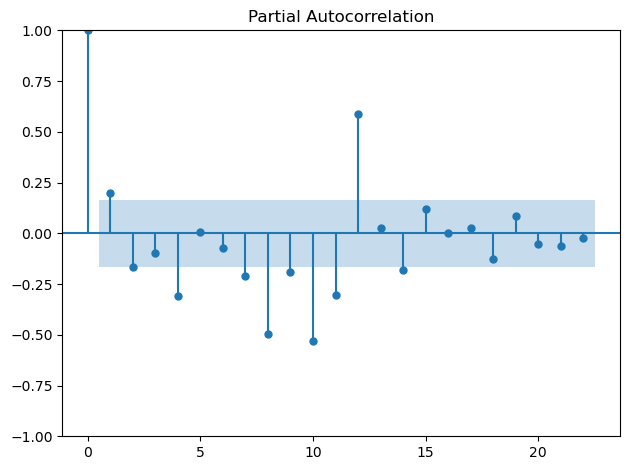

In [135]:
plot_pacf(ap_diff)
plt.tight_layout()

lag 1 Í≥º lag 8~12 ÏóêÏÑú Ïú†ÏùòÎØ∏Ìïú lag Í∞Ä Ìè¨Ï∞©Îê®

acfÏôÄ pacfÏóêÏÑú n=12ÏØ§ Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇ®.  
Ïù¥Îäî Í≥ÑÏ†àÏÑ± ÏÑ±Î∂ÑÏúºÎ°ú ÏÉùÍ∞ÅÌïòÍ≥†,  
auto-arimaÎ•º Ï†ÅÌï©Ìï† Îïå Í≥ÑÏ†àÏÑ±ÏùÑ Í≥†Î†§ÌïòÎèÑÎ°ù Ìï¥Ïïº Ìï®.

### Í≥ÑÏ†à Ï∞®Î∂Ñ

In [113]:
ap_diff = ap_tf.diff(12)
ap_diff = ap_diff.dropna()

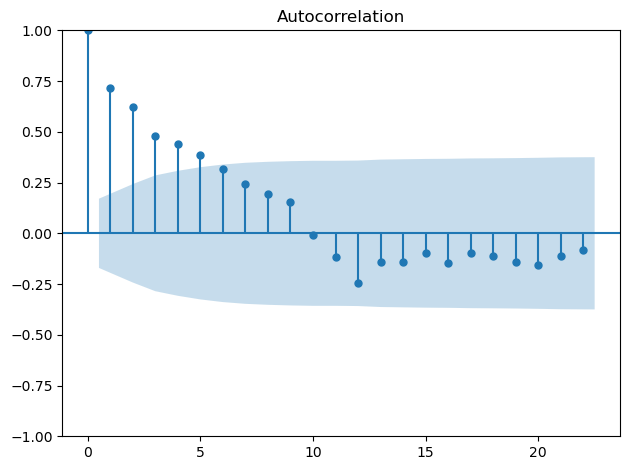

In [114]:
plot_acf(ap_diff)
plt.tight_layout()

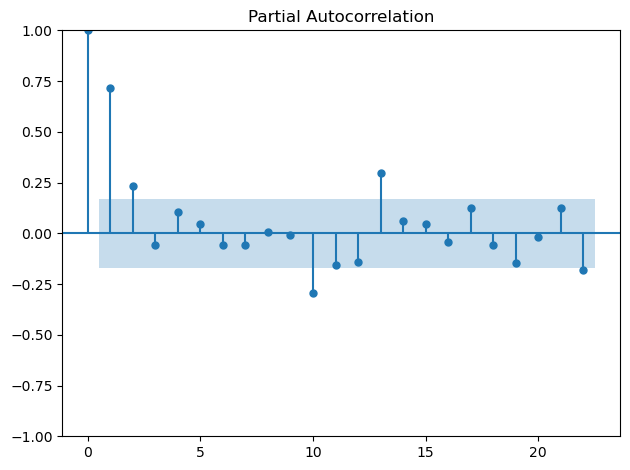

In [115]:
plot_pacf(ap_diff)
plt.tight_layout()

n=2,3,10,13 ÏØ§ Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇ®.  
ACF 2,3 -> ÏßßÏùÄ Í∏∞Í∞Ñ ÎÇ¥ Ìå®ÌÑ¥Ïù¥ÎÇò Ìö®Í≥ºÍ∞Ä ÏßÄÏÜçÎê®  
PACF 10, 13 -> Í∏¥ ÏãúÏ∞® Ìö®Í≥ºÍ∞Ä ÏûàÏùÑ Îïå  
Í≥ÑÏ†àÏÑ± Ï†úÍ±∞ ÌõÑÏóêÎèÑ lag 2,3ÏóêÏÑú Îã®Í∏∞Ï†Å ÏûêÍ∏∞ÏÉÅÍ¥Ä, lag 10,13ÏóêÏÑú Ïû•Í∏∞Ï†Å ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§.  
Îç∞Ïù¥ÌÑ∞Ïóê 2~3Í∞úÏõî Ïù¥ÎÇ¥ Îã®Í∏∞ Ìå®ÌÑ¥Í≥º Ìï®Íªò ÏïΩ 1ÎÖÑ Ï£ºÍ∏∞Ïùò Ïû•Í∏∞ Î∞òÎ≥µ Ìå®ÌÑ¥Ïù¥ Ìï®Íªò Ï°¥Ïû¨ÌïúÎã§Í≥† ÌåêÎã®ÌïòÏòÄÎã§.

### ARIMAÎ•º Ï†ÅÌï©Ìï† Îïå Í≥ÑÏ†àÏÑ± ÏöîÏù∏ÎèÑ Í≥†Î†§

In [117]:
ap_tf

Passengers
0      4.718499
1      4.770685
2      4.882802
3      4.859812
4      4.795791
..          ...
139    6.406880
140    6.230481
141    6.133398
142    5.966147
143    6.068426

[144 rows x 1 columns]

### Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ (train, test)

In [118]:
train_size = int(len(ap_tf)*0.8)
train_size

115

In [119]:
ap_tf_train = ap_tf[:train_size]
ap_tf_test = ap_tf[train_size:]

### auto-arima Î°ú Î™®Îç∏ Ï†ÅÌï©

In [121]:
ap_tf.isna().mean()

Passengers    0.0
dtype: float64

Í≥ÑÏ†à Ï∞®Î∂ÑÏùÄ ÏùºÏ†ïÌïú Ï£ºÍ∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Î∂ÑÌï¥ Í≥ÑÏ†àÏÑ±ÏùÑ Ï†úÍ±∞ÌïòÎäî Í≤É  
`.diff(12)`Ïó∞ÏÇ∞ ÎòêÎäî `auto_arima`Ïùò `seasonal=True, D=1` ÏÑ§Ï†ïÏùÑ ÌÜµÌï¥ ÎèôÏùºÌïú Ìö®Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§.  
  
Q1. `auto_arima`ÏóêÏÑú Ï∞®Î∂ÑÏúºÎ°ú ÏÉùÍ∏¥ Í≤∞Ï∏°Ïπò Ï†úÍ±∞Îäî Ïñ¥ÎñªÍ≤å Ìï¥Ï£ºÎÇòÏöî?  
‚Üí Ï∞®Î∂Ñ ÌõÑ ÏÉùÍ∏¥ nullÍ∞íÏùÄ Î™®Îç∏ Ï†ÅÌï© Ïãú ÏûêÎèô Ï†úÏô∏. Îã®, Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Ïóê NAÎäî Ï≤òÎ¶¨ ÌõÑ Ï†ÅÌï©.  
air passengers.csv ÌååÏùºÏóêÏÑú nullÍ∞íÏùÄ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå.

In [120]:
# seasonal=TrueÎ°ú Ï≤¥ÌÅ¨
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_d = 12, D=12)
# Ï∞®Î∂Ñ ÌõÑ ÏÉùÍ∏¥ NAÎäî Î™®Îç∏ Ï†ÅÌï© Ïãú ÏûêÎèô Ï†úÏô∏. Îã®, Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Ïóê NAÎäî Ï≤òÎ¶¨ ÌõÑ Ï†ÅÌï©
res = model.fit(ap_tf_train)
res

C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.739, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.581, Time=0.29 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.679, Time=0.31 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.853, Time=0.36 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.29 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.386, Time=0.43 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.47 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.662, Time=0.51 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-223.361, Time=0.36 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-217.007, Time=0.50 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-197.568, Time=0.27 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-215.500, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-199.544, Time=0.19 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0]          
Total fit time: 6.037 seconds


AutoARIMA(D=12, max_d=12, trace=True)

Best model:  ARIMA(5,1,2)(0,0,0)[0]

In [127]:
model = pm.AutoARIMA(seasonal=False, suppress_warnings = True, trace = True) # Í≥ÑÏ†à Ï∞®Î∂Ñ False
res = model.fit(ap_tf_train)
res

C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.739, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.581, Time=0.36 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.679, Time=0.36 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.853, Time=0.48 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.22 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.386, Time=0.44 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.42 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.662, Time=0.43 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-223.361, Time=0.34 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-217.007, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-197.568, Time=0.19 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-215.500, Time=0.38 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-199.544, Time=0.20 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0]          
Total fit time: 5.544 seconds


AutoARIMA(seasonal=False, trace=True)

Best model:  ARIMA(5,1,2)(0,0,0)[0]

### ARIMA(5,1,2) Î™®Îç∏Ïù¥ Í∞ÄÏû• Ï†ÅÌï©ÌïòÎã§Í≥† ÎÇòÏò¥

### Í≥ÑÏ†àÏÑ± ÏûàÏùåÏóêÎèÑ Best model: ARIMA(5,1,2)(0,0,0)[0] ÏÑ†Ï†ï Ïù¥Ïú† Î∂ÑÏÑù
1. Í≥ÑÏ†àÏÑ±ÏùÑ ÏûêÎèô ÌÉêÏÉâÌñàÏßÄÎßå Í≥ÑÏ†à Ï∞®Î∂Ñ(D)ÍπåÏßÄ ÌïòÏßÄ ÏïäÏïÑÎèÑ ÏïàÏ†ïÏ†ÅÏù¥Îùº ÌåêÎã®.  
-> Ï†ïÎßê Í∑∏Îü¨ÌïúÏßÄ, AutoARIMAÏóêÏÑú Í≥ÑÏ†àÏÑ± ÏöîÏù∏ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÍ≥† AutoARIMAÎ•º ÏßÑÌñâÌïòÏòÄÏúºÎÇò,  
Í∞ôÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏúºÎØÄÎ°ú Í≥ÑÏ†à Ï∞®Î∂ÑÍπåÏßÄ ÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêúÎã§Í≥† ÌåêÎã® -> ok

2. ÎπÑÍ≥ÑÏ†à AR, MA Ìï≠ÏúºÎ°ú Ï∂©Î∂ÑÌûà ÏÑ§Î™Ö Í∞ÄÎä•ÌïòÎã§Í≥† Î≥∏ Í≤É.  
-> AR(5) ‚Üí 5Í∞úÏõîÍ∞ÑÏùò ÏûêÍ∏∞ÏÉÅÍ¥Ä Ï°¥Ïû¨, MA(2) ‚Üí 2Í∞úÏõîÍ∞ÑÏùò Ïò§Ï∞®Ìï≠ ÏòÅÌñ•  
   Ïã§Ï†úÎ°ú airline-passenger Îç∞Ïù¥ÌÑ∞Îäî Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±(m=12)Ïù¥ ÏûàÏßÄÎßå, Îã®Í∏∞ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ Îçî ÌÅ∞ ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÄÍ∏∞ÎèÑ Ìï®.

In [105]:
preds, conf_int = res.predict(n_periods=ap_tf_test.shape[0], return_conf_int=True)
# confidence intervalÍπåÏßÄ ÎèÑÏ∂ú

C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [106]:
print(preds.shape)
print(type(preds))
print('--'*15)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*15)
print(preds)
print('--'*15)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
------------------------------
29
<class 'int'>
------------------------------
115    6.176214
116    6.182071
117    6.099738
118    6.030763
119    6.097969
120    6.113729
121    6.094691
122    6.148871
123    6.123316
124    6.072517
125    6.120769
126    6.111686
127    6.078911
128    6.132751
129    6.120188
130    6.079614
131    6.126978
132    6.115426
133    6.078761
134    6.127931
135    6.117933
136    6.080627
137    6.126992
138    6.116946
139    6.080379
140    6.126230
141    6.117400
142    6.081388
143    6.125788
dtype: float64
------------------------------
[[6.01243868 6.33998944]
 [5.90255119 6.46159106]
 [5.73063885 6.4688366 ]
 [5.61449045 6.44703646]
 [5.66114948 6.53478839]
 [5.66022354 6.56723491]
 [5.61889959 6.57048264]
 [5.64765755 6.650085  ]
 [5.5919308  6.65470169]
 [5.51166679 6.63336702]
 [5.53812709 6.70341138]
 [5.50890599 6.71446692]
 [5.45561332 6.702209  ]
 [5.49118889 6.77431213]
 [5.45860288 6.7817

In [107]:
print(ap_tf_train.shape[0])
print(preds.shape[0])

115
29


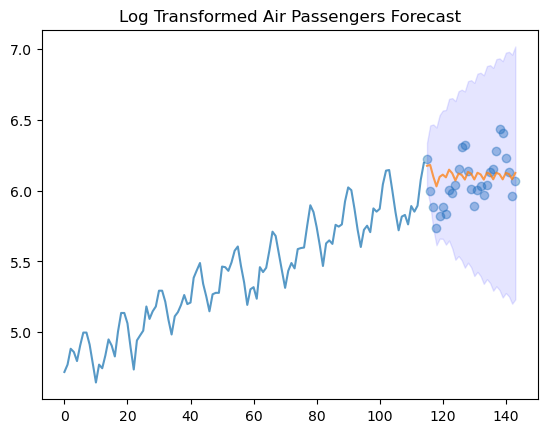

In [128]:
x_axis = np.arange(ap_tf_train.shape[0] + preds.shape[0])
plt.plot(x_axis[:ap_tf_train.shape[0]],ap_tf_train, alpha=0.75)
plt.plot(x_axis[ap_tf_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_tf_train.shape[0]:],ap_tf_test,
            alpha=0.4, marker='o')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Log Transformed Air Passengers Forecast") 
plt.show() 

Ï¶â, Í≥ÑÏ†àÏÑ±ÏùÄ Î∂ÄÍ∞ÄÏ†ÅÏù∏ ÏöîÏÜåÏùº Îøê, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Îã®Í∏∞ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÌïµÏã¨ Íµ¨Ï°∞ÎùºÎäî Í≤∞Î°† ÎèÑÏ∂ú.

## ARCH

### üîç Ïôú ARCH Î™®Îç∏ÏùÑ Ïì∞Í≤å ÎêòÏóàÏùÑÍπå?  
ARIMAÎäî ÌèâÍ∑†(Ï∂îÏÑ∏ + ÏûêÍ∏∞ÏÉÅÍ¥Ä) Ï§ëÏã¨Ïùò Î™®Îç∏Ïù¥Îã§.  
‚Üí Îç∞Ïù¥ÌÑ∞Ïùò **Î≥ÄÎèôÏÑ±(Î∂ÑÏÇ∞)** Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Î≥ÄÌôîÌïòÎäî Í≤ΩÏö∞Îäî Ïûò ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌïúÎã§.  

ÎßåÏïΩ ÏûîÏ∞®Î•º Î∂ÑÏÑùÌñàÎäîÎç∞,  

1. Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÍ≥†
2. ÌÅ∞ Î≥ÄÎèôÍ≥º ÏûëÏùÄ Î≥ÄÎèôÏù¥ Î∞òÎ≥µÎêúÎã§Î©¥
‚Üí Ï°∞Í±¥Î∂Ä Ïù¥Î∂ÑÏÇ∞ÏÑ±(Volatility Clustering) ÌòÑÏÉÅÏù¥Îã§.  

Ïù¥Îü¥ Îïê ARCH / GARCH Î™®Îç∏ÏùÑ Ï∂îÍ∞ÄÎ°ú Ï†ÅÏö©Ìï¥ÏÑú ÏòàÏ∏°Í∞íÏùò Î∂àÌôïÏã§ÏÑ±(variance)ÍπåÏßÄ Î™®Îç∏ÎßÅÌïúÎã§.

In [87]:
import sys
!{sys.executable} -m pip install arch

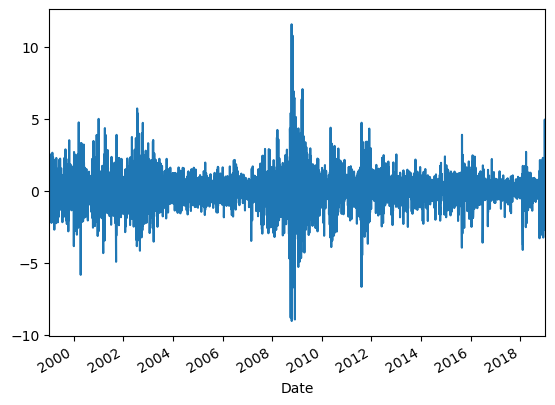

In [88]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(2002,1,1) # start date
en = dt.datetime(2022,1,1) # end date
data = arch.data.sp500.load() 
market = data["Adj Close"] # Ï¢ÖÍ∞ÄÎßå ÌôúÏö©
returns = 100 * market.pct_change().dropna() # returnÍ∞íÏúºÎ°ú Î≥ÄÌôò
ax = returns.plot() # ÏàòÏùµÎ•†ÏùÑ Í∑∏ÎûòÌîÑÎ°ú ÎßåÎì§Í∏∞
xlim = ax.set_xlim(returns.index.min(), returns.index.max())
plt.show()

Conditional Heteroskedasticity(=Ï°∞Í±¥Î∂Ä Ïù¥Î∂ÑÏÇ∞ÏÑ±)Í∞Ä ÎÇòÌÉÄÎÇ®
#### Ï°∞Í±¥Î∂Ä Ïù¥Î∂ÑÏÇ∞ÏÑ±
- ÌèâÍ∑†ÏùÄ ÏùºÏ†ïÌïúÎç∞, Î∂ÑÏÇ∞Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Î≥ÄÌïòÎäî ÌòÑÏÉÅ
- Í∑∏ÎûòÌîÑÏóêÏÑú Î≥ÄÎèô Ìè≠Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïª§Ï°åÎã§ ÏûëÏïÑÏ°åÎã§ ÌïòÎäî Î™®ÏäµÏù¥ Î≥¥ÏûÑ
- ÏûîÏ∞®Ïùò Ï†úÍ≥±Í∞í ÌòπÏùÄ Ï†àÎåÄÍ∞íÏù¥ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ±ÏùÑ Í∞ÄÏßÄÎ©¥ Ï°∞Í±¥Î∂Ä Ïù¥Î∂ÑÏÇ∞ÏÑ± Í∞ÄÎä•ÏÑ± ÎÜíÏùå
- Î≥¥ÌÜµ ARCH Ìö®Í≥º Í≤ÄÏÇ¨Ïóê ÏÇ¨Ïö©

=> Volatility Clustering Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò Ï†ÑÌòïÏ†ÅÏù∏ Ïã†Ìò∏Ïù¥Î©∞, ARCH/GARCH Î™®Îç∏ÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎã§Îäî Í∑ºÍ±∞Îã§.

### ARCH Ï†ÅÌï©

In [111]:
from arch import arch_model # Í∏∞Î≥∏ Î™®Îç∏Ïù¥ garch modelÏùÑ Ï†ÅÌï©ÌïòÎèÑÎ°ù ÏÑ§Í≥Ñ

# ARCHÎßå ÏõêÌï† Í≤ΩÏö∞ vol='ARCH'Î°ú Î™ÖÏãúÌï¥Ï§òÏïº Ìï®.
am = arch_model(returns) # returnÏùÑ garchÎ™®Îç∏Ïóê Ï†ÅÌï©
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

volatility modelÏùÑ Î≥¥Î©¥,  
alpha[1], Beta[1] ÏùÄ GARCH(1,1)ÏùÑ ÏùòÎØ∏ÌïòÎ©∞, p-valueÎ•º ÌÜµÌï¥ Ïã†Î¢∞ÎèÑ 99%ÏóêÏÑú Ïù¥Îì§Ïù¥ Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎèÑÏ∂ú

## ÏãúÍ∞ÅÌôî

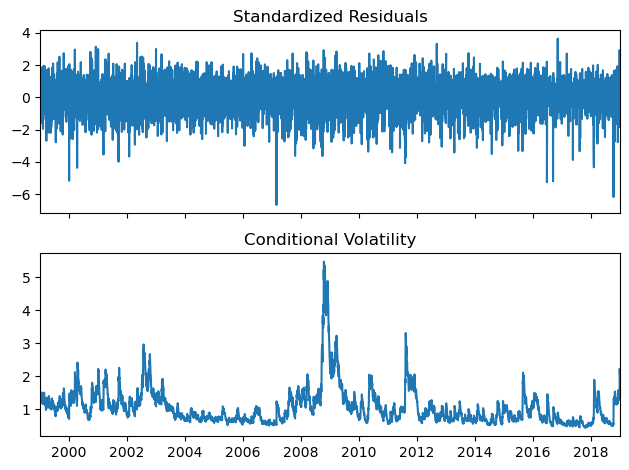

In [90]:
res.plot()
plt.tight_layout()

Î™®Îç∏ Ï†ÅÌï© ÌõÑ ÎÇ®ÏùÄ ÏûîÏ∞®(Residual)ÏôÄ Ìè¨Ï∞©Ìïú Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±(conditional volatility)ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏

1. Î™®Îç∏ Ï†ÅÌï©: ARCH/GARCH Î™®Îç∏Ïù¥ Í∏àÏúµ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ± Ìè¨Ï∞©
   
2. ÌëúÏ§ÄÌôî ÏûîÏ∞® ÌôïÏù∏: ÏÉÅÎã® Í∑∏ÎûòÌîÑÏùò ÌëúÏ§ÄÌôî ÏûîÏ∞® ÌèâÍ∑†Ïù¥ 0Ïóê Í∞ÄÍπùÍ≥†, Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÎØÄÎ°ú Î≥ÄÎèôÏÑ±ÏùÑ Ïûò ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎã§.
   
3. Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌòÑÏÉÅ: ÌïòÎã® Í∑∏ÎûòÌîÑÏùò Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±ÏùÄ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Î≥ÄÎèôÏÑ±Ïùò Î≥ÄÌôîÎ•º Î™ÖÌôïÌûà Î≥¥Ïó¨Ï§ÄÎã§.  
- 2008-2009ÎÖÑ Î≥ÄÎèôÏÑ± Í∏âÏ¶ù: Ïù¥ ÏãúÍ∏∞Ïóê Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ¨Í≤å ÏπòÏÜüÏïòÎäîÎç∞, Ïù¥Îäî ÎãπÏãú Î∞úÏÉùÌñàÎçò **Í∏ÄÎ°úÎ≤å Í∏àÏúµ ÏúÑÍ∏∞(ÏÑúÎ∏åÌîÑÎùºÏûÑ Î™®Í∏∞ÏßÄ ÏÇ¨ÌÉú)** ÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêúÎã§. Ïù¥ ÏúÑÍ∏∞Îäî ÎØ∏Íµ≠ Î∂ÄÎèôÏÇ∞ ÏãúÏû• Î∂ïÍ¥¥ÏóêÏÑú ÏãúÏûëÎêòÏñ¥ Ï†Ñ ÏÑ∏Í≥Ñ Í∏àÏúµ ÏãúÏû•Ïóê ÌÅ∞ Ï∂©Í≤©ÏùÑ Ï£ºÏóàÎçò ÏãúÍ∏∞Ïù¥Îã§.  